In [1]:
### Keras and Tensorflow >2.0

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('Binance_BTCUSDT_1h - Copy.csv')

In [7]:
df.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,2017-08-17 04-AM,BTC/USDT,16199.91,16199.91,4261.32,4308.83,44.5100,190952.85,NaN
1,2017-08-17 05-AM,BTC/USDT,4308.83,4328.69,4291.37,4315.32,23.2300,100304.82,NaN
2,2017-08-17 06-AM,BTC/USDT,4315.32,4345.45,4309.37,4324.35,7.2300,31282.31,NaN
3,2017-08-17 07-AM,BTC/USDT,4324.35,4349.99,4287.41,4349.99,4.4400,19241.06,NaN
4,2017-08-17 08-AM,BTC/USDT,4349.99,4377.85,4333.32,4360.69,0.9499,4139.70,NaN


In [8]:
df.tail()

,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
36321,6/20/2021 20:00,BTC/USDT,35502.83,36137.72,35380.00,35822.37,5917.223794,2.119367e+08,127542.0
36322,6/20/2021 21:00,BTC/USDT,35822.36,35900.00,35500.00,35542.52,3082.556277,1.099551e+08,69855.0
36323,6/20/2021 22:00,BTC/USDT,35542.52,35790.00,35391.24,35650.10,2292.838545,8.163607e+07,54751.0
36324,6/20/2021 23:00,BTC/USDT,35650.10,35727.94,35460.00,35600.16,1749.517961,6.229077e+07,56588.0
36325,6/21/2021 0:00,BTC/USDT,35600.17,35750.00,35503.87,35503.87,384.632891,1.369806e+07,11103.0


In [9]:
df1=df.reset_index()['close']

In [10]:
df1

0         4308.83
1         4315.32
2         4324.35
3         4349.99
4         4360.69
           ...   
36321    35822.37
36322    35542.52
36323    35650.10
36324    35600.16
36325    35503.87
Name: close, Length: 36326, dtype: float64

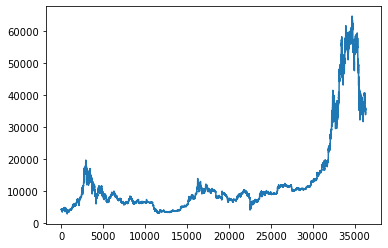

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [13]:
import numpy as np

In [14]:
df1

0         4308.83
1         4315.32
2         4324.35
3         4349.99
4         4360.69
           ...   
36321    35822.37
36322    35542.52
36323    35650.10
36324    35600.16
36325    35503.87
Name: close, Length: 36326, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
print(df1)

[[0.02254086]
 [0.02264611]
 [0.02279257]
 ...
 [0.53084696]
 [0.53003701]
 [0.52847534]]


In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(23611, 12715)

In [121]:
train_data

array([[0.02254086],
       [0.02264611],
       [0.02279257],
       ...,
       [0.07821596],
       [0.0775004 ],
       [0.07810762]])

In [122]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [123]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 72
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [124]:
print(X_train.shape), print(y_train.shape)

(23538, 72)
(23538,)


(None, None)

In [125]:
print(X_test.shape), print(ytest.shape)

(12642, 72)
(12642,)


(None, None)

In [126]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [127]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [128]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(72,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [129]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 72, 50)            10400     
_________________________________________________________________
lstm_16 (LSTM)               (None, 72, 50)            20200     
_________________________________________________________________
lstm_17 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [130]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 72, 50)            10400     
_________________________________________________________________
lstm_16 (LSTM)               (None, 72, 50)            20200     
_________________________________________________________________
lstm_17 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [131]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=256,verbose=1)

Epoch 1/50
92/92 [==============================] - 113s 1s/step - loss: 2.7087e-04 - val_loss: 8.8648e-04
Epoch 2/50
92/92 [==============================] - 92s 1s/step - loss: 1.5919e-05 - val_loss: 0.0013
Epoch 3/50
92/92 [==============================] - 95s 1s/step - loss: 1.4887e-05 - val_loss: 0.0017
Epoch 4/50
92/92 [==============================] - 95s 1s/step - loss: 1.3827e-05 - val_loss: 8.7733e-04
Epoch 5/50
92/92 [==============================] - 99s 1s/step - loss: 1.2791e-05 - val_loss: 0.0012
Epoch 6/50
92/92 [==============================] - 94s 1s/step - loss: 1.2297e-05 - val_loss: 5.4547e-04
Epoch 7/50
92/92 [==============================] - 91s 994ms/step - loss: 1.1656e-05 - val_loss: 8.8510e-04
Epoch 8/50
92/92 [==============================] - 93s 1s/step - loss: 1.0920e-05 - val_loss: 9.1021e-04
Epoch 9/50
92/92 [==============================] - 99s 1s/step - loss: 1.1315e-05 - val_loss: 7.2057e-04
Epoch 10/50
92/92 [==============================] - 1

In [132]:
import tensorflow as tf

In [133]:
tf.__version__

'2.3.0'

In [134]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [135]:
##Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [136]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

8023.717929064685

In [137]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

29074.931079457234

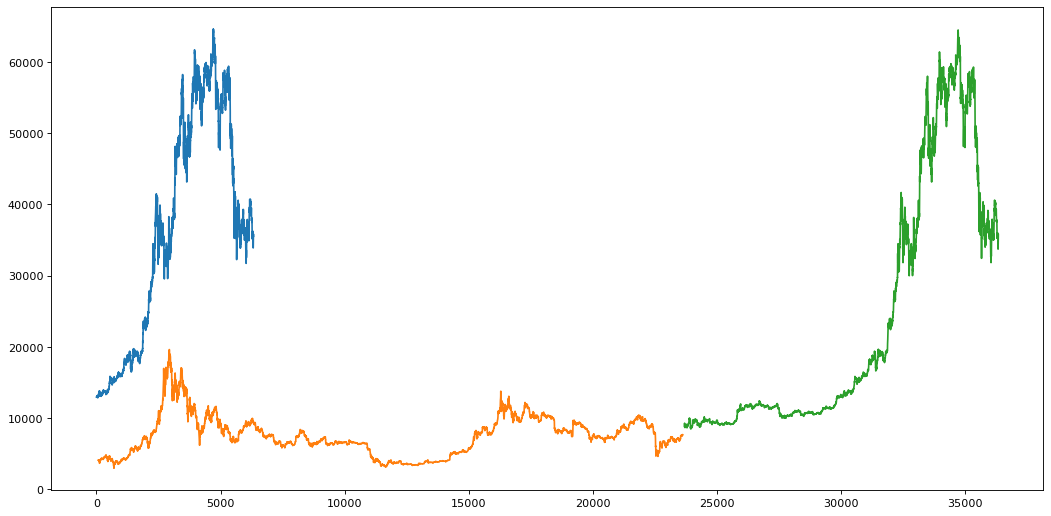

In [151]:
### Plotting 
# shift train predictions for plotting
look_back=72
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(16, 8), dpi=80, facecolor = 'w', edgecolor = 'k')
plt.plot(scaler.inverse_transform(df1[30000:]))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [139]:
len(test_data)

12715

In [140]:
x_input=test_data[12643:].reshape(1,-1)
x_input.shape

(1, 72)

In [141]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [142]:
temp_input

[0.5632721390451174,
 0.5653855622912487,
 0.5677712929297714,
 0.5676749554723082,
 0.5625627450401617,
 0.5601017608995129,
 0.5643368787896382,
 0.5669796714990012,
 0.5610438893345352,
 0.5663140672474378,
 0.5660709530239744,
 0.559777554540138,
 0.5561117034441128,
 0.547394461017875,
 0.5422809531115539,
 0.5461190439042556,
 0.5400754091990271,
 0.5249990836588643,
 0.5256106805479104,
 0.5283796526207519,
 0.5308455022895554,
 0.5303617066067061,
 0.5335998777779327,
 0.5323714941031421,
 0.53831279053285,
 0.5282695295001838,
 0.521980996544502,
 0.5233120428633569,
 0.5287565688684696,
 0.5328496133364776,
 0.5330503974649949,
 0.53323674719332,
 0.5307903596371355,
 0.5316505850148869,
 0.5355522520421433,
 0.5323538160175134,
 0.532780360652409,
 0.5404576775277149,
 0.5383844759809959,
 0.5347260853614747,
 0.5327185684448442,
 0.5285729762727654,
 0.5356078812473788,
 0.5382109388101449,
 0.5342341804650342,
 0.5293371885615975,
 0.5281485400334035,
 0.5265257242095382,


In [143]:
# demonstrate prediction for next 72 hours
from numpy import array

lst_output=[]
n_steps=72
i=0
while(i<720):
    
    if(len(temp_input)>72):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5310004]
73
1 day input [0.56538556 0.56777129 0.56767496 0.56256275 0.56010176 0.56433688
 0.56697967 0.56104389 0.56631407 0.56607095 0.55977755 0.5561117
 0.54739446 0.54228095 0.54611904 0.54007541 0.52499908 0.52561068
 0.52837965 0.5308455  0.53036171 0.53359988 0.53237149 0.53831279
 0.52826953 0.521981   0.52331204 0.52875657 0.53284961 0.5330504
 0.53323675 0.53079036 0.53165059 0.53555225 0.53235382 0.53278036
 0.54045768 0.53838448 0.53472609 0.53271857 0.52857298 0.53560788
 0.53821094 0.53423418 0.52933719 0.52814854 0.52652572 0.53062769
 0.52999322 0.52885437 0.53330178 0.53205426 0.52854589 0.53064602
 0.52573199 0.52008328 0.50549286 0.50202357 0.50282266 0.50256932
 0.5092231  0.51094063 0.51345902 0.51342659 0.51933756 0.52845831
 0.53364091 0.52910218 0.53084696 0.53003701 0.52847534 0.53100038]
1 day output [[0.53009355]]
2 day input [0.56777129 0.56767496 0.56256275 0.56010176 0.56433688 0.56697967
 0.56104389 0.56631407 0.56607095 0.55977755 0.5561117  0.54739

10 day output [[0.52500576]]
11 day input [0.55977755 0.5561117  0.54739446 0.54228095 0.54611904 0.54007541
 0.52499908 0.52561068 0.52837965 0.5308455  0.53036171 0.53359988
 0.53237149 0.53831279 0.52826953 0.521981   0.52331204 0.52875657
 0.53284961 0.5330504  0.53323675 0.53079036 0.53165059 0.53555225
 0.53235382 0.53278036 0.54045768 0.53838448 0.53472609 0.53271857
 0.52857298 0.53560788 0.53821094 0.53423418 0.52933719 0.52814854
 0.52652572 0.53062769 0.52999322 0.52885437 0.53330178 0.53205426
 0.52854589 0.53064602 0.52573199 0.52008328 0.50549286 0.50202357
 0.50282266 0.50256932 0.5092231  0.51094063 0.51345902 0.51342659
 0.51933756 0.52845831 0.53364091 0.52910218 0.53084696 0.53003701
 0.52847534 0.53100038 0.53009355 0.52940679 0.52879059 0.52818704
 0.52759171 0.52701622 0.52646917 0.52595347 0.52546746 0.52500576]
11 day output [[0.52456164]]
12 day input [0.5561117  0.54739446 0.54228095 0.54611904 0.54007541 0.52499908
 0.52561068 0.52837965 0.5308455  0.53036171

21 day output [[0.5199262]]
22 day input [0.53359988 0.53237149 0.53831279 0.52826953 0.521981   0.52331204
 0.52875657 0.53284961 0.5330504  0.53323675 0.53079036 0.53165059
 0.53555225 0.53235382 0.53278036 0.54045768 0.53838448 0.53472609
 0.53271857 0.52857298 0.53560788 0.53821094 0.53423418 0.52933719
 0.52814854 0.52652572 0.53062769 0.52999322 0.52885437 0.53330178
 0.53205426 0.52854589 0.53064602 0.52573199 0.52008328 0.50549286
 0.50202357 0.50282266 0.50256932 0.5092231  0.51094063 0.51345902
 0.51342659 0.51933756 0.52845831 0.53364091 0.52910218 0.53084696
 0.53003701 0.52847534 0.53100038 0.53009355 0.52940679 0.52879059
 0.52818704 0.52759171 0.52701622 0.52646917 0.52595347 0.52546746
 0.52500576 0.52456164 0.52412802 0.52369767 0.52326518 0.52282548
 0.52237505 0.52191198 0.52143538 0.52094489 0.52044147 0.51992619]
22 day output [[0.51940084]]
23 day input [0.53237149 0.53831279 0.52826953 0.521981   0.52331204 0.52875657
 0.53284961 0.5330504  0.53323675 0.53079036 

34 day output [[0.5128389]]
35 day input [0.53235382 0.53278036 0.54045768 0.53838448 0.53472609 0.53271857
 0.52857298 0.53560788 0.53821094 0.53423418 0.52933719 0.52814854
 0.52652572 0.53062769 0.52999322 0.52885437 0.53330178 0.53205426
 0.52854589 0.53064602 0.52573199 0.52008328 0.50549286 0.50202357
 0.50282266 0.50256932 0.5092231  0.51094063 0.51345902 0.51342659
 0.51933756 0.52845831 0.53364091 0.52910218 0.53084696 0.53003701
 0.52847534 0.53100038 0.53009355 0.52940679 0.52879059 0.52818704
 0.52759171 0.52701622 0.52646917 0.52595347 0.52546746 0.52500576
 0.52456164 0.52412802 0.52369767 0.52326518 0.52282548 0.52237505
 0.52191198 0.52143538 0.52094489 0.52044147 0.51992619 0.51940084
 0.5188669  0.5183264  0.51778102 0.51723206 0.51668113 0.51612943
 0.51557761 0.51502675 0.51447701 0.51392901 0.51338285 0.5128389 ]
35 day output [[0.51229703]]
36 day input [0.53278036 0.54045768 0.53838448 0.53472609 0.53271857 0.52857298
 0.53560788 0.53821094 0.53423418 0.52933719 

47 day output [[0.50596344]]
48 day input [0.53062769 0.52999322 0.52885437 0.53330178 0.53205426 0.52854589
 0.53064602 0.52573199 0.52008328 0.50549286 0.50202357 0.50282266
 0.50256932 0.5092231  0.51094063 0.51345902 0.51342659 0.51933756
 0.52845831 0.53364091 0.52910218 0.53084696 0.53003701 0.52847534
 0.53100038 0.53009355 0.52940679 0.52879059 0.52818704 0.52759171
 0.52701622 0.52646917 0.52595347 0.52546746 0.52500576 0.52456164
 0.52412802 0.52369767 0.52326518 0.52282548 0.52237505 0.52191198
 0.52143538 0.52094489 0.52044147 0.51992619 0.51940084 0.5188669
 0.5183264  0.51778102 0.51723206 0.51668113 0.51612943 0.51557761
 0.51502675 0.51447701 0.51392901 0.51338285 0.5128389  0.51229703
 0.51175749 0.51121992 0.51068473 0.51015168 0.50962073 0.50909185
 0.50856525 0.50804061 0.50751823 0.50699776 0.50647962 0.50596344]
48 day output [[0.5054495]]
49 day input [0.52999322 0.52885437 0.53330178 0.53205426 0.52854589 0.53064602
 0.52573199 0.52008328 0.50549286 0.50202357 0

59 day output [[0.49993643]]
60 day input [0.50256932 0.5092231  0.51094063 0.51345902 0.51342659 0.51933756
 0.52845831 0.53364091 0.52910218 0.53084696 0.53003701 0.52847534
 0.53100038 0.53009355 0.52940679 0.52879059 0.52818704 0.52759171
 0.52701622 0.52646917 0.52595347 0.52546746 0.52500576 0.52456164
 0.52412802 0.52369767 0.52326518 0.52282548 0.52237505 0.52191198
 0.52143538 0.52094489 0.52044147 0.51992619 0.51940084 0.5188669
 0.5183264  0.51778102 0.51723206 0.51668113 0.51612943 0.51557761
 0.51502675 0.51447701 0.51392901 0.51338285 0.5128389  0.51229703
 0.51175749 0.51121992 0.51068473 0.51015168 0.50962073 0.50909185
 0.50856525 0.50804061 0.50751823 0.50699776 0.50647962 0.50596344
 0.50544947 0.50493765 0.50442797 0.50392044 0.50341505 0.50291175
 0.50241053 0.50191164 0.5014146  0.50091982 0.50042701 0.49993643]
60 day output [[0.49944776]]
61 day input [0.5092231  0.51094063 0.51345902 0.51342659 0.51933756 0.52845831
 0.53364091 0.52910218 0.53084696 0.53003701 

72 day output [[0.49373573]]
73 day input [0.53009355 0.52940679 0.52879059 0.52818704 0.52759171 0.52701622
 0.52646917 0.52595347 0.52546746 0.52500576 0.52456164 0.52412802
 0.52369767 0.52326518 0.52282548 0.52237505 0.52191198 0.52143538
 0.52094489 0.52044147 0.51992619 0.51940084 0.5188669  0.5183264
 0.51778102 0.51723206 0.51668113 0.51612943 0.51557761 0.51502675
 0.51447701 0.51392901 0.51338285 0.5128389  0.51229703 0.51175749
 0.51121992 0.51068473 0.51015168 0.50962073 0.50909185 0.50856525
 0.50804061 0.50751823 0.50699776 0.50647962 0.50596344 0.50544947
 0.50493765 0.50442797 0.50392044 0.50341505 0.50291175 0.50241053
 0.50191164 0.5014146  0.50091982 0.50042701 0.49993643 0.49944776
 0.49896109 0.49847656 0.4979938  0.49751312 0.49703443 0.49655753
 0.49608263 0.49560964 0.4951382  0.49466899 0.49420148 0.49373573]
73 day output [[0.4932719]]
74 day input [0.52940679 0.52879059 0.52818704 0.52759171 0.52701622 0.52646917
 0.52595347 0.52546746 0.52500576 0.52456164 0

82 day output [[0.48917675]]
83 day input [0.52456164 0.52412802 0.52369767 0.52326518 0.52282548 0.52237505
 0.52191198 0.52143538 0.52094489 0.52044147 0.51992619 0.51940084
 0.5188669  0.5183264  0.51778102 0.51723206 0.51668113 0.51612943
 0.51557761 0.51502675 0.51447701 0.51392901 0.51338285 0.5128389
 0.51229703 0.51175749 0.51121992 0.51068473 0.51015168 0.50962073
 0.50909185 0.50856525 0.50804061 0.50751823 0.50699776 0.50647962
 0.50596344 0.50544947 0.50493765 0.50442797 0.50392044 0.50341505
 0.50291175 0.50241053 0.50191164 0.5014146  0.50091982 0.50042701
 0.49993643 0.49944776 0.49896109 0.49847656 0.4979938  0.49751312
 0.49703443 0.49655753 0.49608263 0.49560964 0.4951382  0.49466899
 0.49420148 0.49373573 0.49327189 0.49280971 0.49234945 0.49189088
 0.49143419 0.49097922 0.49052599 0.49007443 0.4896248  0.48917675]
83 day output [[0.48873046]]
84 day input [0.52412802 0.52369767 0.52326518 0.52282548 0.52237505 0.52191198
 0.52143538 0.52094489 0.52044147 0.51992619 

94 day output [[0.48393345]]
95 day input [0.5188669  0.5183264  0.51778102 0.51723206 0.51668113 0.51612943
 0.51557761 0.51502675 0.51447701 0.51392901 0.51338285 0.5128389
 0.51229703 0.51175749 0.51121992 0.51068473 0.51015168 0.50962073
 0.50909185 0.50856525 0.50804061 0.50751823 0.50699776 0.50647962
 0.50596344 0.50544947 0.50493765 0.50442797 0.50392044 0.50341505
 0.50291175 0.50241053 0.50191164 0.5014146  0.50091982 0.50042701
 0.49993643 0.49944776 0.49896109 0.49847656 0.4979938  0.49751312
 0.49703443 0.49655753 0.49608263 0.49560964 0.4951382  0.49466899
 0.49420148 0.49373573 0.49327189 0.49280971 0.49234945 0.49189088
 0.49143419 0.49097922 0.49052599 0.49007443 0.4896248  0.48917675
 0.48873046 0.48828584 0.48784325 0.48740202 0.48696265 0.48652482
 0.48608884 0.48565435 0.48522162 0.48479059 0.4843612  0.48393345]
95 day output [[0.48350725]]
96 day input [0.5183264  0.51778102 0.51723206 0.51668113 0.51612943 0.51557761
 0.51502675 0.51447701 0.51392901 0.51338285 

106 day output [[0.47892654]]
107 day input [0.51229703 0.51175749 0.51121992 0.51068473 0.51015168 0.50962073
 0.50909185 0.50856525 0.50804061 0.50751823 0.50699776 0.50647962
 0.50596344 0.50544947 0.50493765 0.50442797 0.50392044 0.50341505
 0.50291175 0.50241053 0.50191164 0.5014146  0.50091982 0.50042701
 0.49993643 0.49944776 0.49896109 0.49847656 0.4979938  0.49751312
 0.49703443 0.49655753 0.49608263 0.49560964 0.4951382  0.49466899
 0.49420148 0.49373573 0.49327189 0.49280971 0.49234945 0.49189088
 0.49143419 0.49097922 0.49052599 0.49007443 0.4896248  0.48917675
 0.48873046 0.48828584 0.48784325 0.48740202 0.48696265 0.48652482
 0.48608884 0.48565435 0.48522162 0.48479059 0.4843612  0.48393345
 0.48350725 0.4830828  0.48266    0.48223868 0.48181909 0.48140109
 0.48098466 0.4805699  0.4801566  0.47974497 0.47933492 0.47892654]
107 day output [[0.4785195]]
108 day input [0.51175749 0.51121992 0.51068473 0.51015168 0.50962073 0.50909185
 0.50856525 0.50804061 0.50751823 0.50699

116 day output [[0.47492737]]
117 day input [0.50699776 0.50647962 0.50596344 0.50544947 0.50493765 0.50442797
 0.50392044 0.50341505 0.50291175 0.50241053 0.50191164 0.5014146
 0.50091982 0.50042701 0.49993643 0.49944776 0.49896109 0.49847656
 0.4979938  0.49751312 0.49703443 0.49655753 0.49608263 0.49560964
 0.4951382  0.49466899 0.49420148 0.49373573 0.49327189 0.49280971
 0.49234945 0.49189088 0.49143419 0.49097922 0.49052599 0.49007443
 0.4896248  0.48917675 0.48873046 0.48828584 0.48784325 0.48740202
 0.48696265 0.48652482 0.48608884 0.48565435 0.48522162 0.48479059
 0.4843612  0.48393345 0.48350725 0.4830828  0.48266    0.48223868
 0.48181909 0.48140109 0.48098466 0.4805699  0.4801566  0.47974497
 0.47933492 0.47892654 0.4785195  0.47811419 0.47771052 0.47730827
 0.47690749 0.47650853 0.47611091 0.47571483 0.47532034 0.47492737]
117 day output [[0.4745358]]
118 day input [0.50647962 0.50596344 0.50544947 0.50493765 0.50442797 0.50392044
 0.50341505 0.50291175 0.50241053 0.501911

127 day output [[0.47070277]]
128 day input [0.5014146  0.50091982 0.50042701 0.49993643 0.49944776 0.49896109
 0.49847656 0.4979938  0.49751312 0.49703443 0.49655753 0.49608263
 0.49560964 0.4951382  0.49466899 0.49420148 0.49373573 0.49327189
 0.49280971 0.49234945 0.49189088 0.49143419 0.49097922 0.49052599
 0.49007443 0.4896248  0.48917675 0.48873046 0.48828584 0.48784325
 0.48740202 0.48696265 0.48652482 0.48608884 0.48565435 0.48522162
 0.48479059 0.4843612  0.48393345 0.48350725 0.4830828  0.48266
 0.48223868 0.48181909 0.48140109 0.48098466 0.4805699  0.4801566
 0.47974497 0.47933492 0.47892654 0.4785195  0.47811419 0.47771052
 0.47730827 0.47690749 0.47650853 0.47611091 0.47571483 0.47532034
 0.47492737 0.47453579 0.47414592 0.47375733 0.47337022 0.47298491
 0.47260085 0.47221822 0.47183722 0.47145763 0.47107938 0.47070277]
128 day output [[0.4703275]]
129 day input [0.50091982 0.50042701 0.49993643 0.49944776 0.49896109 0.49847656
 0.4979938  0.49751312 0.49703443 0.49655753 

138 day output [[0.4666535]]
139 day input [0.49608263 0.49560964 0.4951382  0.49466899 0.49420148 0.49373573
 0.49327189 0.49280971 0.49234945 0.49189088 0.49143419 0.49097922
 0.49052599 0.49007443 0.4896248  0.48917675 0.48873046 0.48828584
 0.48784325 0.48740202 0.48696265 0.48652482 0.48608884 0.48565435
 0.48522162 0.48479059 0.4843612  0.48393345 0.48350725 0.4830828
 0.48266    0.48223868 0.48181909 0.48140109 0.48098466 0.4805699
 0.4801566  0.47974497 0.47933492 0.47892654 0.4785195  0.47811419
 0.47771052 0.47730827 0.47690749 0.47650853 0.47611091 0.47571483
 0.47532034 0.47492737 0.47453579 0.47414592 0.47375733 0.47337022
 0.47298491 0.47260085 0.47221822 0.47183722 0.47145763 0.47107938
 0.47070277 0.4703275  0.46995375 0.46958125 0.46921039 0.46884093
 0.46847278 0.46810618 0.46774086 0.46737698 0.46701467 0.4666535 ]
139 day output [[0.46629387]]
140 day input [0.49560964 0.4951382  0.49466899 0.49420148 0.49373573 0.49327189
 0.49280971 0.49234945 0.49189088 0.4914341

149 day output [[0.46277237]]
150 day input [0.49097922 0.49052599 0.49007443 0.4896248  0.48917675 0.48873046
 0.48828584 0.48784325 0.48740202 0.48696265 0.48652482 0.48608884
 0.48565435 0.48522162 0.48479059 0.4843612  0.48393345 0.48350725
 0.4830828  0.48266    0.48223868 0.48181909 0.48140109 0.48098466
 0.4805699  0.4801566  0.47974497 0.47933492 0.47892654 0.4785195
 0.47811419 0.47771052 0.47730827 0.47690749 0.47650853 0.47611091
 0.47571483 0.47532034 0.47492737 0.47453579 0.47414592 0.47375733
 0.47337022 0.47298491 0.47260085 0.47221822 0.47183722 0.47145763
 0.47107938 0.47070277 0.4703275  0.46995375 0.46958125 0.46921039
 0.46884093 0.46847278 0.46810618 0.46774086 0.46737698 0.46701467
 0.4666535  0.46629387 0.46593562 0.46557865 0.46522319 0.46486899
 0.46451622 0.46416479 0.46381465 0.46346587 0.46311858 0.46277237]
150 day output [[0.46242762]]
151 day input [0.49052599 0.49007443 0.4896248  0.48917675 0.48873046 0.48828584
 0.48784325 0.48740202 0.48696265 0.48652

161 day output [[0.45872155]]
162 day input [0.48565435 0.48522162 0.48479059 0.4843612  0.48393345 0.48350725
 0.4830828  0.48266    0.48223868 0.48181909 0.48140109 0.48098466
 0.4805699  0.4801566  0.47974497 0.47933492 0.47892654 0.4785195
 0.47811419 0.47771052 0.47730827 0.47690749 0.47650853 0.47611091
 0.47571483 0.47532034 0.47492737 0.47453579 0.47414592 0.47375733
 0.47337022 0.47298491 0.47260085 0.47221822 0.47183722 0.47145763
 0.47107938 0.47070277 0.4703275  0.46995375 0.46958125 0.46921039
 0.46884093 0.46847278 0.46810618 0.46774086 0.46737698 0.46701467
 0.4666535  0.46629387 0.46593562 0.46557865 0.46522319 0.46486899
 0.46451622 0.46416479 0.46381465 0.46346587 0.46311858 0.46277237
 0.46242762 0.46208423 0.46174204 0.46140125 0.46106175 0.46072361
 0.46038669 0.46005112 0.45971677 0.45938373 0.45905197 0.45872155]
162 day output [[0.4583923]]
163 day input [0.48522162 0.48479059 0.4843612  0.48393345 0.48350725 0.4830828
 0.48266    0.48223868 0.48181909 0.4814010

 0.45644325 0.45612273 0.45580342 0.45548534 0.45516852 0.45485288]
174 day output [[0.4545385]]
175 day input [0.4801566  0.47974497 0.47933492 0.47892654 0.4785195  0.47811419
 0.47771052 0.47730827 0.47690749 0.47650853 0.47611091 0.47571483
 0.47532034 0.47492737 0.47453579 0.47414592 0.47375733 0.47337022
 0.47298491 0.47260085 0.47221822 0.47183722 0.47145763 0.47107938
 0.47070277 0.4703275  0.46995375 0.46958125 0.46921039 0.46884093
 0.46847278 0.46810618 0.46774086 0.46737698 0.46701467 0.4666535
 0.46629387 0.46593562 0.46557865 0.46522319 0.46486899 0.46451622
 0.46416479 0.46381465 0.46346587 0.46311858 0.46277237 0.46242762
 0.46208423 0.46174204 0.46140125 0.46106175 0.46072361 0.46038669
 0.46005112 0.45971677 0.45938373 0.45905197 0.45872155 0.45839229
 0.45806429 0.45773765 0.45741215 0.45708793 0.456765   0.45644325
 0.45612273 0.45580342 0.45548534 0.45516852 0.45485288 0.45453849]
175 day output [[0.45422518]]
176 day input [0.47974497 0.47933492 0.47892654 0.47851

184 day output [[0.4514592]]
185 day input [0.47611091 0.47571483 0.47532034 0.47492737 0.47453579 0.47414592
 0.47375733 0.47337022 0.47298491 0.47260085 0.47221822 0.47183722
 0.47145763 0.47107938 0.47070277 0.4703275  0.46995375 0.46958125
 0.46921039 0.46884093 0.46847278 0.46810618 0.46774086 0.46737698
 0.46701467 0.4666535  0.46629387 0.46593562 0.46557865 0.46522319
 0.46486899 0.46451622 0.46416479 0.46381465 0.46346587 0.46311858
 0.46277237 0.46242762 0.46208423 0.46174204 0.46140125 0.46106175
 0.46072361 0.46038669 0.46005112 0.45971677 0.45938373 0.45905197
 0.45872155 0.45839229 0.45806429 0.45773765 0.45741215 0.45708793
 0.456765   0.45644325 0.45612273 0.45580342 0.45548534 0.45516852
 0.45485288 0.45453849 0.45422518 0.45391318 0.45360234 0.45329264
 0.45298424 0.45267683 0.4523707  0.45206571 0.45176184 0.4514592 ]
185 day output [[0.4511577]]
186 day input [0.47571483 0.47532034 0.47492737 0.47453579 0.47414592 0.47375733
 0.47337022 0.47298491 0.47260085 0.472218

196 day output [[0.44791564]]
197 day input [0.47145763 0.47107938 0.47070277 0.4703275  0.46995375 0.46958125
 0.46921039 0.46884093 0.46847278 0.46810618 0.46774086 0.46737698
 0.46701467 0.4666535  0.46629387 0.46593562 0.46557865 0.46522319
 0.46486899 0.46451622 0.46416479 0.46381465 0.46346587 0.46311858
 0.46277237 0.46242762 0.46208423 0.46174204 0.46140125 0.46106175
 0.46072361 0.46038669 0.46005112 0.45971677 0.45938373 0.45905197
 0.45872155 0.45839229 0.45806429 0.45773765 0.45741215 0.45708793
 0.456765   0.45644325 0.45612273 0.45580342 0.45548534 0.45516852
 0.45485288 0.45453849 0.45422518 0.45391318 0.45360234 0.45329264
 0.45298424 0.45267683 0.4523707  0.45206571 0.45176184 0.4514592
 0.45115769 0.45085728 0.45055807 0.45025992 0.44996303 0.44966716
 0.44937244 0.44907889 0.44878644 0.44849497 0.44820476 0.44791564]
197 day output [[0.44762757]]
198 day input [0.47107938 0.47070277 0.4703275  0.46995375 0.46958125 0.46921039
 0.46884093 0.46847278 0.46810618 0.46774

206 day output [[0.44508344]]
207 day input [0.46774086 0.46737698 0.46701467 0.4666535  0.46629387 0.46593562
 0.46557865 0.46522319 0.46486899 0.46451622 0.46416479 0.46381465
 0.46346587 0.46311858 0.46277237 0.46242762 0.46208423 0.46174204
 0.46140125 0.46106175 0.46072361 0.46038669 0.46005112 0.45971677
 0.45938373 0.45905197 0.45872155 0.45839229 0.45806429 0.45773765
 0.45741215 0.45708793 0.456765   0.45644325 0.45612273 0.45580342
 0.45548534 0.45516852 0.45485288 0.45453849 0.45422518 0.45391318
 0.45360234 0.45329264 0.45298424 0.45267683 0.4523707  0.45206571
 0.45176184 0.4514592  0.45115769 0.45085728 0.45055807 0.45025992
 0.44996303 0.44966716 0.44937244 0.44907889 0.44878644 0.44849497
 0.44820476 0.44791564 0.44762757 0.44734052 0.4470548  0.44676986
 0.44648618 0.44620353 0.44592181 0.44564131 0.44536182 0.44508344]
207 day output [[0.44480607]]
208 day input [0.46737698 0.46701467 0.4666535  0.46629387 0.46593562 0.46557865
 0.46522319 0.46486899 0.46451622 0.4641

218 day output [[0.4418231]]
219 day input [0.46346587 0.46311858 0.46277237 0.46242762 0.46208423 0.46174204
 0.46140125 0.46106175 0.46072361 0.46038669 0.46005112 0.45971677
 0.45938373 0.45905197 0.45872155 0.45839229 0.45806429 0.45773765
 0.45741215 0.45708793 0.456765   0.45644325 0.45612273 0.45580342
 0.45548534 0.45516852 0.45485288 0.45453849 0.45422518 0.45391318
 0.45360234 0.45329264 0.45298424 0.45267683 0.4523707  0.45206571
 0.45176184 0.4514592  0.45115769 0.45085728 0.45055807 0.45025992
 0.44996303 0.44966716 0.44937244 0.44907889 0.44878644 0.44849497
 0.44820476 0.44791564 0.44762757 0.44734052 0.4470548  0.44676986
 0.44648618 0.44620353 0.44592181 0.44564131 0.44536182 0.44508344
 0.44480607 0.44452971 0.44425437 0.44398019 0.44370699 0.4434348
 0.44316363 0.44289353 0.44262436 0.44235626 0.44208917 0.4418231 ]
219 day output [[0.44155788]]
220 day input [0.46311858 0.46277237 0.46242762 0.46208423 0.46174204 0.46140125
 0.46106175 0.46072361 0.46038669 0.460051

228 day output [[0.43921593]]
229 day input [0.46005112 0.45971677 0.45938373 0.45905197 0.45872155 0.45839229
 0.45806429 0.45773765 0.45741215 0.45708793 0.456765   0.45644325
 0.45612273 0.45580342 0.45548534 0.45516852 0.45485288 0.45453849
 0.45422518 0.45391318 0.45360234 0.45329264 0.45298424 0.45267683
 0.4523707  0.45206571 0.45176184 0.4514592  0.45115769 0.45085728
 0.45055807 0.45025992 0.44996303 0.44966716 0.44937244 0.44907889
 0.44878644 0.44849497 0.44820476 0.44791564 0.44762757 0.44734052
 0.4470548  0.44676986 0.44648618 0.44620353 0.44592181 0.44564131
 0.44536182 0.44508344 0.44480607 0.44452971 0.44425437 0.44398019
 0.44370699 0.4434348  0.44316363 0.44289353 0.44262436 0.44235626
 0.44208917 0.4418231  0.44155788 0.44129372 0.44103062 0.44076839
 0.44050723 0.44024703 0.43998784 0.43972963 0.43947235 0.43921593]
229 day output [[0.43896064]]
230 day input [0.45971677 0.45938373 0.45905197 0.45872155 0.45839229 0.45806429
 0.45773765 0.45741215 0.45708793 0.4567

240 day output [[0.43621388]]
241 day input [0.45612273 0.45580342 0.45548534 0.45516852 0.45485288 0.45453849
 0.45422518 0.45391318 0.45360234 0.45329264 0.45298424 0.45267683
 0.4523707  0.45206571 0.45176184 0.4514592  0.45115769 0.45085728
 0.45055807 0.45025992 0.44996303 0.44966716 0.44937244 0.44907889
 0.44878644 0.44849497 0.44820476 0.44791564 0.44762757 0.44734052
 0.4470548  0.44676986 0.44648618 0.44620353 0.44592181 0.44564131
 0.44536182 0.44508344 0.44480607 0.44452971 0.44425437 0.44398019
 0.44370699 0.4434348  0.44316363 0.44289353 0.44262436 0.44235626
 0.44208917 0.4418231  0.44155788 0.44129372 0.44103062 0.44076839
 0.44050723 0.44024703 0.43998784 0.43972963 0.43947235 0.43921593
 0.43896064 0.43870631 0.43845278 0.43820018 0.43794879 0.43769804
 0.43744841 0.43719965 0.43695185 0.43670487 0.43645889 0.43621388]
241 day output [[0.43596974]]
242 day input [0.45580342 0.45548534 0.45516852 0.45485288 0.45453849 0.45422518
 0.45391318 0.45360234 0.45329264 0.4529

251 day output [[0.4335773]]
252 day input [0.45267683 0.4523707  0.45206571 0.45176184 0.4514592  0.45115769
 0.45085728 0.45055807 0.45025992 0.44996303 0.44966716 0.44937244
 0.44907889 0.44878644 0.44849497 0.44820476 0.44791564 0.44762757
 0.44734052 0.4470548  0.44676986 0.44648618 0.44620353 0.44592181
 0.44564131 0.44536182 0.44508344 0.44480607 0.44452971 0.44425437
 0.44398019 0.44370699 0.4434348  0.44316363 0.44289353 0.44262436
 0.44235626 0.44208917 0.4418231  0.44155788 0.44129372 0.44103062
 0.44076839 0.44050723 0.44024703 0.43998784 0.43972963 0.43947235
 0.43921593 0.43896064 0.43870631 0.43845278 0.43820018 0.43794879
 0.43769804 0.43744841 0.43719965 0.43695185 0.43670487 0.43645889
 0.43621388 0.43596974 0.43572643 0.43548408 0.43524256 0.43500215
 0.43476236 0.4345237  0.43428579 0.43404871 0.43381268 0.4335773 ]
252 day output [[0.4333429]]
253 day input [0.4523707  0.45206571 0.45176184 0.4514592  0.45115769 0.45085728
 0.45055807 0.45025992 0.44996303 0.449667

262 day output [[0.4310461]]
263 day input [0.44937244 0.44907889 0.44878644 0.44849497 0.44820476 0.44791564
 0.44762757 0.44734052 0.4470548  0.44676986 0.44648618 0.44620353
 0.44592181 0.44564131 0.44536182 0.44508344 0.44480607 0.44452971
 0.44425437 0.44398019 0.44370699 0.4434348  0.44316363 0.44289353
 0.44262436 0.44235626 0.44208917 0.4418231  0.44155788 0.44129372
 0.44103062 0.44076839 0.44050723 0.44024703 0.43998784 0.43972963
 0.43947235 0.43921593 0.43896064 0.43870631 0.43845278 0.43820018
 0.43794879 0.43769804 0.43744841 0.43719965 0.43695185 0.43670487
 0.43645889 0.43621388 0.43596974 0.43572643 0.43548408 0.43524256
 0.43500215 0.43476236 0.4345237  0.43428579 0.43404871 0.43381268
 0.4335773  0.4333429  0.43310943 0.43287668 0.43264493 0.43241394
 0.43218389 0.43195462 0.43172625 0.43149865 0.43127188 0.4310461 ]
263 day output [[0.43082097]]
264 day input [0.44907889 0.44878644 0.44849497 0.44820476 0.44791564 0.44762757
 0.44734052 0.4470548  0.44676986 0.44648

273 day output [[0.42861503]]
274 day input [0.44620353 0.44592181 0.44564131 0.44536182 0.44508344 0.44480607
 0.44452971 0.44425437 0.44398019 0.44370699 0.4434348  0.44316363
 0.44289353 0.44262436 0.44235626 0.44208917 0.4418231  0.44155788
 0.44129372 0.44103062 0.44076839 0.44050723 0.44024703 0.43998784
 0.43972963 0.43947235 0.43921593 0.43896064 0.43870631 0.43845278
 0.43820018 0.43794879 0.43769804 0.43744841 0.43719965 0.43695185
 0.43670487 0.43645889 0.43621388 0.43596974 0.43572643 0.43548408
 0.43524256 0.43500215 0.43476236 0.4345237  0.43428579 0.43404871
 0.43381268 0.4335773  0.4333429  0.43310943 0.43287668 0.43264493
 0.43241394 0.43218389 0.43195462 0.43172625 0.43149865 0.43127188
 0.4310461  0.43082097 0.43059671 0.43037325 0.43015069 0.42992893
 0.42970785 0.42948776 0.42926833 0.42904976 0.42883199 0.42861503]
274 day output [[0.42839882]]
275 day input [0.44592181 0.44564131 0.44536182 0.44508344 0.44480607 0.44452971
 0.44425437 0.44398019 0.44370699 0.4434

284 day output [[0.42628]]
285 day input [0.44316363 0.44289353 0.44262436 0.44235626 0.44208917 0.4418231
 0.44155788 0.44129372 0.44103062 0.44076839 0.44050723 0.44024703
 0.43998784 0.43972963 0.43947235 0.43921593 0.43896064 0.43870631
 0.43845278 0.43820018 0.43794879 0.43769804 0.43744841 0.43719965
 0.43695185 0.43670487 0.43645889 0.43621388 0.43596974 0.43572643
 0.43548408 0.43524256 0.43500215 0.43476236 0.4345237  0.43428579
 0.43404871 0.43381268 0.4335773  0.4333429  0.43310943 0.43287668
 0.43264493 0.43241394 0.43218389 0.43195462 0.43172625 0.43149865
 0.43127188 0.4310461  0.43082097 0.43059671 0.43037325 0.43015069
 0.42992893 0.42970785 0.42948776 0.42926833 0.42904976 0.42883199
 0.42861503 0.42839882 0.4281835  0.42796886 0.427755   0.42754203
 0.42732978 0.4271183  0.42690754 0.42669758 0.42648831 0.42627999]
285 day output [[0.42607233]]
286 day input [0.44289353 0.44262436 0.44235626 0.44208917 0.4418231  0.44155788
 0.44129372 0.44103062 0.44076839 0.44050723

295 day output [[0.42403662]]
296 day input [0.44024703 0.43998784 0.43972963 0.43947235 0.43921593 0.43896064
 0.43870631 0.43845278 0.43820018 0.43794879 0.43769804 0.43744841
 0.43719965 0.43695185 0.43670487 0.43645889 0.43621388 0.43596974
 0.43572643 0.43548408 0.43524256 0.43500215 0.43476236 0.4345237
 0.43428579 0.43404871 0.43381268 0.4335773  0.4333429  0.43310943
 0.43287668 0.43264493 0.43241394 0.43218389 0.43195462 0.43172625
 0.43149865 0.43127188 0.4310461  0.43082097 0.43059671 0.43037325
 0.43015069 0.42992893 0.42970785 0.42948776 0.42926833 0.42904976
 0.42883199 0.42861503 0.42839882 0.4281835  0.42796886 0.427755
 0.42754203 0.42732978 0.4271183  0.42690754 0.42669758 0.42648831
 0.42627999 0.42607233 0.42586535 0.42565921 0.42545375 0.42524916
 0.42504522 0.42484197 0.42463955 0.42443782 0.42423686 0.42403662]
296 day output [[0.42383698]]
297 day input [0.43998784 0.43972963 0.43947235 0.43921593 0.43896064 0.43870631
 0.43845278 0.43820018 0.43794879 0.4376980

306 day output [[0.4218808]]
307 day input [0.43744841 0.43719965 0.43695185 0.43670487 0.43645889 0.43621388
 0.43596974 0.43572643 0.43548408 0.43524256 0.43500215 0.43476236
 0.4345237  0.43428579 0.43404871 0.43381268 0.4335773  0.4333429
 0.43310943 0.43287668 0.43264493 0.43241394 0.43218389 0.43195462
 0.43172625 0.43149865 0.43127188 0.4310461  0.43082097 0.43059671
 0.43037325 0.43015069 0.42992893 0.42970785 0.42948776 0.42926833
 0.42904976 0.42883199 0.42861503 0.42839882 0.4281835  0.42796886
 0.427755   0.42754203 0.42732978 0.4271183  0.42690754 0.42669758
 0.42648831 0.42627999 0.42607233 0.42586535 0.42565921 0.42545375
 0.42524916 0.42504522 0.42484197 0.42463955 0.42443782 0.42423686
 0.42403662 0.42383698 0.42363819 0.4234401  0.42324269 0.42304611
 0.42285004 0.42265481 0.42246026 0.42226636 0.42207325 0.42188081]
307 day output [[0.421689]]
308 day input [0.43719965 0.43695185 0.43670487 0.43645889 0.43621388 0.43596974
 0.43572643 0.43548408 0.43524256 0.43500215

316 day output [[0.41999373]]
317 day input [0.43500215 0.43476236 0.4345237  0.43428579 0.43404871 0.43381268
 0.4335773  0.4333429  0.43310943 0.43287668 0.43264493 0.43241394
 0.43218389 0.43195462 0.43172625 0.43149865 0.43127188 0.4310461
 0.43082097 0.43059671 0.43037325 0.43015069 0.42992893 0.42970785
 0.42948776 0.42926833 0.42904976 0.42883199 0.42861503 0.42839882
 0.4281835  0.42796886 0.427755   0.42754203 0.42732978 0.4271183
 0.42690754 0.42669758 0.42648831 0.42627999 0.42607233 0.42586535
 0.42565921 0.42545375 0.42524916 0.42504522 0.42484197 0.42463955
 0.42443782 0.42423686 0.42403662 0.42383698 0.42363819 0.4234401
 0.42324269 0.42304611 0.42285004 0.42265481 0.42246026 0.42226636
 0.42207325 0.42188081 0.421689   0.42149791 0.4213075  0.42111787
 0.42092884 0.42074054 0.4205527  0.42036578 0.42017946 0.41999373]
317 day output [[0.4198088]]
318 day input [0.43476236 0.4345237  0.43428579 0.43404871 0.43381268 0.4335773
 0.4333429  0.43310943 0.43287668 0.43264493 

326 day output [[0.41817313]]
327 day input [0.43264493 0.43241394 0.43218389 0.43195462 0.43172625 0.43149865
 0.43127188 0.4310461  0.43082097 0.43059671 0.43037325 0.43015069
 0.42992893 0.42970785 0.42948776 0.42926833 0.42904976 0.42883199
 0.42861503 0.42839882 0.4281835  0.42796886 0.427755   0.42754203
 0.42732978 0.4271183  0.42690754 0.42669758 0.42648831 0.42627999
 0.42607233 0.42586535 0.42565921 0.42545375 0.42524916 0.42504522
 0.42484197 0.42463955 0.42443782 0.42423686 0.42403662 0.42383698
 0.42363819 0.4234401  0.42324269 0.42304611 0.42285004 0.42265481
 0.42246026 0.42226636 0.42207325 0.42188081 0.421689   0.42149791
 0.4213075  0.42111787 0.42092884 0.42074054 0.4205527  0.42036578
 0.42017946 0.41999373 0.4198088  0.41962445 0.41944081 0.41925767
 0.4190754  0.41889361 0.41871259 0.41853213 0.41835237 0.41817313]
327 day output [[0.41799462]]
328 day input [0.43241394 0.43218389 0.43195462 0.43172625 0.43149865 0.43127188
 0.4310461  0.43082097 0.43059671 0.4303

338 day output [[0.41607237]]
339 day input [0.42992893 0.42970785 0.42948776 0.42926833 0.42904976 0.42883199
 0.42861503 0.42839882 0.4281835  0.42796886 0.427755   0.42754203
 0.42732978 0.4271183  0.42690754 0.42669758 0.42648831 0.42627999
 0.42607233 0.42586535 0.42565921 0.42545375 0.42524916 0.42504522
 0.42484197 0.42463955 0.42443782 0.42423686 0.42403662 0.42383698
 0.42363819 0.4234401  0.42324269 0.42304611 0.42285004 0.42265481
 0.42246026 0.42226636 0.42207325 0.42188081 0.421689   0.42149791
 0.4213075  0.42111787 0.42092884 0.42074054 0.4205527  0.42036578
 0.42017946 0.41999373 0.4198088  0.41962445 0.41944081 0.41925767
 0.4190754  0.41889361 0.41871259 0.41853213 0.41835237 0.41817313
 0.41799462 0.41781676 0.41763949 0.41746289 0.41728687 0.41711152
 0.41693676 0.41676262 0.41658917 0.41641632 0.41624403 0.41607237]
339 day output [[0.41590127]]
340 day input [0.42970785 0.42948776 0.42926833 0.42904976 0.42883199 0.42861503
 0.42839882 0.4281835  0.42796886 0.4277

349 day output [[0.41422355]]
350 day input [0.42754203 0.42732978 0.4271183  0.42690754 0.42669758 0.42648831
 0.42627999 0.42607233 0.42586535 0.42565921 0.42545375 0.42524916
 0.42504522 0.42484197 0.42463955 0.42443782 0.42423686 0.42403662
 0.42383698 0.42363819 0.4234401  0.42324269 0.42304611 0.42285004
 0.42265481 0.42246026 0.42226636 0.42207325 0.42188081 0.421689
 0.42149791 0.4213075  0.42111787 0.42092884 0.42074054 0.4205527
 0.42036578 0.42017946 0.41999373 0.4198088  0.41962445 0.41944081
 0.41925767 0.4190754  0.41889361 0.41871259 0.41853213 0.41835237
 0.41817313 0.41799462 0.41781676 0.41763949 0.41746289 0.41728687
 0.41711152 0.41693676 0.41676262 0.41658917 0.41641632 0.41624403
 0.41607237 0.41590127 0.41573083 0.41556102 0.4153918  0.415223
 0.41505504 0.41488761 0.41472065 0.41455436 0.41438866 0.41422355]
350 day output [[0.41405898]]
351 day input [0.42732978 0.4271183  0.42690754 0.42669758 0.42648831 0.42627999
 0.42607233 0.42586535 0.42565921 0.42545375 

361 day output [[0.41228664]]
362 day input [0.42504522 0.42484197 0.42463955 0.42443782 0.42423686 0.42403662
 0.42383698 0.42363819 0.4234401  0.42324269 0.42304611 0.42285004
 0.42265481 0.42246026 0.42226636 0.42207325 0.42188081 0.421689
 0.42149791 0.4213075  0.42111787 0.42092884 0.42074054 0.4205527
 0.42036578 0.42017946 0.41999373 0.4198088  0.41962445 0.41944081
 0.41925767 0.4190754  0.41889361 0.41871259 0.41853213 0.41835237
 0.41817313 0.41799462 0.41781676 0.41763949 0.41746289 0.41728687
 0.41711152 0.41693676 0.41676262 0.41658917 0.41641632 0.41624403
 0.41607237 0.41590127 0.41573083 0.41556102 0.4153918  0.415223
 0.41505504 0.41488761 0.41472065 0.41455436 0.41438866 0.41422355
 0.41405898 0.41389504 0.41373158 0.41356885 0.41340664 0.41324499
 0.41308376 0.41292328 0.41276324 0.41260388 0.41244492 0.41228664]
362 day output [[0.4121289]]
363 day input [0.42484197 0.42463955 0.42443782 0.42423686 0.42403662 0.42383698
 0.42363819 0.4234401  0.42324269 0.42304611 0

372 day output [[0.4105813]]
373 day input [0.42285004 0.42265481 0.42246026 0.42226636 0.42207325 0.42188081
 0.421689   0.42149791 0.4213075  0.42111787 0.42092884 0.42074054
 0.4205527  0.42036578 0.42017946 0.41999373 0.4198088  0.41962445
 0.41944081 0.41925767 0.4190754  0.41889361 0.41871259 0.41853213
 0.41835237 0.41817313 0.41799462 0.41781676 0.41763949 0.41746289
 0.41728687 0.41711152 0.41693676 0.41676262 0.41658917 0.41641632
 0.41624403 0.41607237 0.41590127 0.41573083 0.41556102 0.4153918
 0.415223   0.41505504 0.41488761 0.41472065 0.41455436 0.41438866
 0.41422355 0.41405898 0.41389504 0.41373158 0.41356885 0.41340664
 0.41324499 0.41308376 0.41292328 0.41276324 0.41260388 0.41244492
 0.41228664 0.4121289  0.41197169 0.41181505 0.41165891 0.41150343
 0.41134837 0.41119382 0.41103992 0.4108865  0.41073367 0.41058129]
373 day output [[0.41042945]]
374 day input [0.42265481 0.42246026 0.42226636 0.42207325 0.42188081 0.421689
 0.42149791 0.4213075  0.42111787 0.42092884

384 day output [[0.40879375]]
385 day input [0.4205527  0.42036578 0.42017946 0.41999373 0.4198088  0.41962445
 0.41944081 0.41925767 0.4190754  0.41889361 0.41871259 0.41853213
 0.41835237 0.41817313 0.41799462 0.41781676 0.41763949 0.41746289
 0.41728687 0.41711152 0.41693676 0.41676262 0.41658917 0.41641632
 0.41624403 0.41607237 0.41590127 0.41573083 0.41556102 0.4153918
 0.415223   0.41505504 0.41488761 0.41472065 0.41455436 0.41438866
 0.41422355 0.41405898 0.41389504 0.41373158 0.41356885 0.41340664
 0.41324499 0.41308376 0.41292328 0.41276324 0.41260388 0.41244492
 0.41228664 0.4121289  0.41197169 0.41181505 0.41165891 0.41150343
 0.41134837 0.41119382 0.41103992 0.4108865  0.41073367 0.41058129
 0.41042945 0.4102782  0.41012734 0.40997714 0.40982753 0.40967816
 0.40952951 0.40938133 0.40923369 0.40908653 0.40893984 0.40879375]
385 day output [[0.40864816]]
386 day input [0.42036578 0.42017946 0.41999373 0.4198088  0.41962445 0.41944081
 0.41925767 0.4190754  0.41889361 0.41871

394 day output [[0.4073598]]
395 day input [0.41871259 0.41853213 0.41835237 0.41817313 0.41799462 0.41781676
 0.41763949 0.41746289 0.41728687 0.41711152 0.41693676 0.41676262
 0.41658917 0.41641632 0.41624403 0.41607237 0.41590127 0.41573083
 0.41556102 0.4153918  0.415223   0.41505504 0.41488761 0.41472065
 0.41455436 0.41438866 0.41422355 0.41405898 0.41389504 0.41373158
 0.41356885 0.41340664 0.41324499 0.41308376 0.41292328 0.41276324
 0.41260388 0.41244492 0.41228664 0.4121289  0.41197169 0.41181505
 0.41165891 0.41150343 0.41134837 0.41119382 0.41103992 0.4108865
 0.41073367 0.41058129 0.41042945 0.4102782  0.41012734 0.40997714
 0.40982753 0.40967816 0.40952951 0.40938133 0.40923369 0.40908653
 0.40893984 0.40879375 0.40864816 0.40850291 0.40835837 0.40821418
 0.40807056 0.40792742 0.40778479 0.40764263 0.40750098 0.40735981]
395 day output [[0.4072191]]
396 day input [0.41853213 0.41835237 0.41817313 0.41799462 0.41781676 0.41763949
 0.41746289 0.41728687 0.41711152 0.4169367

406 day output [[0.40570313]]
407 day input [0.41658917 0.41641632 0.41624403 0.41607237 0.41590127 0.41573083
 0.41556102 0.4153918  0.415223   0.41505504 0.41488761 0.41472065
 0.41455436 0.41438866 0.41422355 0.41405898 0.41389504 0.41373158
 0.41356885 0.41340664 0.41324499 0.41308376 0.41292328 0.41276324
 0.41260388 0.41244492 0.41228664 0.4121289  0.41197169 0.41181505
 0.41165891 0.41150343 0.41134837 0.41119382 0.41103992 0.4108865
 0.41073367 0.41058129 0.41042945 0.4102782  0.41012734 0.40997714
 0.40982753 0.40967816 0.40952951 0.40938133 0.40923369 0.40908653
 0.40893984 0.40879375 0.40864816 0.40850291 0.40835837 0.40821418
 0.40807056 0.40792742 0.40778479 0.40764263 0.40750098 0.40735981
 0.40721911 0.40707889 0.40693933 0.40679997 0.40666121 0.4065229
 0.40638509 0.40624782 0.40611094 0.40597454 0.40583861 0.40570313]
407 day output [[0.405568]]
408 day input [0.41641632 0.41624403 0.41607237 0.41590127 0.41573083 0.41556102
 0.4153918  0.415223   0.41505504 0.41488761

418 day output [[0.40411294]]
419 day input [0.41455436 0.41438866 0.41422355 0.41405898 0.41389504 0.41373158
 0.41356885 0.41340664 0.41324499 0.41308376 0.41292328 0.41276324
 0.41260388 0.41244492 0.41228664 0.4121289  0.41197169 0.41181505
 0.41165891 0.41150343 0.41134837 0.41119382 0.41103992 0.4108865
 0.41073367 0.41058129 0.41042945 0.4102782  0.41012734 0.40997714
 0.40982753 0.40967816 0.40952951 0.40938133 0.40923369 0.40908653
 0.40893984 0.40879375 0.40864816 0.40850291 0.40835837 0.40821418
 0.40807056 0.40792742 0.40778479 0.40764263 0.40750098 0.40735981
 0.40721911 0.40707889 0.40693933 0.40679997 0.40666121 0.4065229
 0.40638509 0.40624782 0.40611094 0.40597454 0.40583861 0.40570313
 0.405568   0.40543357 0.40529937 0.40516582 0.4050326  0.40489987
 0.40476748 0.40463573 0.40450436 0.40437341 0.4042429  0.40411294]
419 day output [[0.40398332]]
420 day input [0.41438866 0.41422355 0.41405898 0.41389504 0.41373158 0.41356885
 0.41340664 0.41324499 0.41308376 0.412923

429 day output [[0.40271115]]
430 day input [0.41276324 0.41260388 0.41244492 0.41228664 0.4121289  0.41197169
 0.41181505 0.41165891 0.41150343 0.41134837 0.41119382 0.41103992
 0.4108865  0.41073367 0.41058129 0.41042945 0.4102782  0.41012734
 0.40997714 0.40982753 0.40967816 0.40952951 0.40938133 0.40923369
 0.40908653 0.40893984 0.40879375 0.40864816 0.40850291 0.40835837
 0.40821418 0.40807056 0.40792742 0.40778479 0.40764263 0.40750098
 0.40735981 0.40721911 0.40707889 0.40693933 0.40679997 0.40666121
 0.4065229  0.40638509 0.40624782 0.40611094 0.40597454 0.40583861
 0.40570313 0.405568   0.40543357 0.40529937 0.40516582 0.4050326
 0.40489987 0.40476748 0.40463573 0.40450436 0.40437341 0.4042429
 0.40411294 0.40398332 0.40385413 0.40372545 0.40359712 0.40346926
 0.40334186 0.4032149  0.40308818 0.40296209 0.40283638 0.40271115]
430 day output [[0.40258622]]
431 day input [0.41260388 0.41244492 0.41228664 0.4121289  0.41197169 0.41181505
 0.41165891 0.41150343 0.41134837 0.411193

441 day output [[0.40124047]]
442 day input [0.4108865  0.41073367 0.41058129 0.41042945 0.4102782  0.41012734
 0.40997714 0.40982753 0.40967816 0.40952951 0.40938133 0.40923369
 0.40908653 0.40893984 0.40879375 0.40864816 0.40850291 0.40835837
 0.40821418 0.40807056 0.40792742 0.40778479 0.40764263 0.40750098
 0.40735981 0.40721911 0.40707889 0.40693933 0.40679997 0.40666121
 0.4065229  0.40638509 0.40624782 0.40611094 0.40597454 0.40583861
 0.40570313 0.405568   0.40543357 0.40529937 0.40516582 0.4050326
 0.40489987 0.40476748 0.40463573 0.40450436 0.40437341 0.4042429
 0.40411294 0.40398332 0.40385413 0.40372545 0.40359712 0.40346926
 0.40334186 0.4032149  0.40308818 0.40296209 0.40283638 0.40271115
 0.40258622 0.40246183 0.40233779 0.40221426 0.40209109 0.40196836
 0.40184602 0.4017241  0.40160257 0.40148142 0.40136081 0.40124047]
442 day output [[0.4011205]]
443 day input [0.41073367 0.41058129 0.41042945 0.4102782  0.41012734 0.40997714
 0.40982753 0.40967816 0.40952951 0.4093813

453 day output [[0.39982793]]
454 day input [0.40908653 0.40893984 0.40879375 0.40864816 0.40850291 0.40835837
 0.40821418 0.40807056 0.40792742 0.40778479 0.40764263 0.40750098
 0.40735981 0.40721911 0.40707889 0.40693933 0.40679997 0.40666121
 0.4065229  0.40638509 0.40624782 0.40611094 0.40597454 0.40583861
 0.40570313 0.405568   0.40543357 0.40529937 0.40516582 0.4050326
 0.40489987 0.40476748 0.40463573 0.40450436 0.40437341 0.4042429
 0.40411294 0.40398332 0.40385413 0.40372545 0.40359712 0.40346926
 0.40334186 0.4032149  0.40308818 0.40296209 0.40283638 0.40271115
 0.40258622 0.40246183 0.40233779 0.40221426 0.40209109 0.40196836
 0.40184602 0.4017241  0.40160257 0.40148142 0.40136081 0.40124047
 0.40112051 0.40100107 0.40088198 0.40076327 0.40064496 0.40052709
 0.40040955 0.40029243 0.40017575 0.40005937 0.3999435  0.39982793]
454 day output [[0.39971277]]
455 day input [0.40893984 0.40879375 0.40864816 0.40850291 0.40835837 0.40821418
 0.40807056 0.40792742 0.40778479 0.407642

463 day output [[0.39869335]]
464 day input [0.40764263 0.40750098 0.40735981 0.40721911 0.40707889 0.40693933
 0.40679997 0.40666121 0.4065229  0.40638509 0.40624782 0.40611094
 0.40597454 0.40583861 0.40570313 0.405568   0.40543357 0.40529937
 0.40516582 0.4050326  0.40489987 0.40476748 0.40463573 0.40450436
 0.40437341 0.4042429  0.40411294 0.40398332 0.40385413 0.40372545
 0.40359712 0.40346926 0.40334186 0.4032149  0.40308818 0.40296209
 0.40283638 0.40271115 0.40258622 0.40246183 0.40233779 0.40221426
 0.40209109 0.40196836 0.40184602 0.4017241  0.40160257 0.40148142
 0.40136081 0.40124047 0.40112051 0.40100107 0.40088198 0.40076327
 0.40064496 0.40052709 0.40040955 0.40029243 0.40017575 0.40005937
 0.3999435  0.39982793 0.39971277 0.39959791 0.39948356 0.39936951
 0.39925593 0.39914262 0.39902979 0.39891729 0.39880514 0.39869335]
464 day output [[0.39858207]]
465 day input [0.40750098 0.40735981 0.40721911 0.40707889 0.40693933 0.40679997
 0.40666121 0.4065229  0.40638509 0.4062

475 day output [[0.39738095]]
476 day input [0.40597454 0.40583861 0.40570313 0.405568   0.40543357 0.40529937
 0.40516582 0.4050326  0.40489987 0.40476748 0.40463573 0.40450436
 0.40437341 0.4042429  0.40411294 0.40398332 0.40385413 0.40372545
 0.40359712 0.40346926 0.40334186 0.4032149  0.40308818 0.40296209
 0.40283638 0.40271115 0.40258622 0.40246183 0.40233779 0.40221426
 0.40209109 0.40196836 0.40184602 0.4017241  0.40160257 0.40148142
 0.40136081 0.40124047 0.40112051 0.40100107 0.40088198 0.40076327
 0.40064496 0.40052709 0.40040955 0.40029243 0.40017575 0.40005937
 0.3999435  0.39982793 0.39971277 0.39959791 0.39948356 0.39936951
 0.39925593 0.39914262 0.39902979 0.39891729 0.39880514 0.39869335
 0.39858207 0.398471   0.39836037 0.39825004 0.39814016 0.39803055
 0.39792144 0.39781258 0.39770418 0.39759606 0.39748836 0.39738095]
476 day output [[0.3972739]]
477 day input [0.40583861 0.40570313 0.405568   0.40543357 0.40529937 0.40516582
 0.4050326  0.40489987 0.40476748 0.40463

485 day output [[0.39632648]]
486 day input [0.40463573 0.40450436 0.40437341 0.4042429  0.40411294 0.40398332
 0.40385413 0.40372545 0.40359712 0.40346926 0.40334186 0.4032149
 0.40308818 0.40296209 0.40283638 0.40271115 0.40258622 0.40246183
 0.40233779 0.40221426 0.40209109 0.40196836 0.40184602 0.4017241
 0.40160257 0.40148142 0.40136081 0.40124047 0.40112051 0.40100107
 0.40088198 0.40076327 0.40064496 0.40052709 0.40040955 0.40029243
 0.40017575 0.40005937 0.3999435  0.39982793 0.39971277 0.39959791
 0.39948356 0.39936951 0.39925593 0.39914262 0.39902979 0.39891729
 0.39880514 0.39869335 0.39858207 0.398471   0.39836037 0.39825004
 0.39814016 0.39803055 0.39792144 0.39781258 0.39770418 0.39759606
 0.39748836 0.39738095 0.3972739  0.39716727 0.39706084 0.39695501
 0.39684936 0.39674401 0.3966392  0.3965345  0.39643037 0.39632648]
486 day output [[0.3962229]]
487 day input [0.40450436 0.40437341 0.4042429  0.40411294 0.40398332 0.40385413
 0.40372545 0.40359712 0.40346926 0.4033418

497 day output [[0.39510626]]
498 day input [0.40308818 0.40296209 0.40283638 0.40271115 0.40258622 0.40246183
 0.40233779 0.40221426 0.40209109 0.40196836 0.40184602 0.4017241
 0.40160257 0.40148142 0.40136081 0.40124047 0.40112051 0.40100107
 0.40088198 0.40076327 0.40064496 0.40052709 0.40040955 0.40029243
 0.40017575 0.40005937 0.3999435  0.39982793 0.39971277 0.39959791
 0.39948356 0.39936951 0.39925593 0.39914262 0.39902979 0.39891729
 0.39880514 0.39869335 0.39858207 0.398471   0.39836037 0.39825004
 0.39814016 0.39803055 0.39792144 0.39781258 0.39770418 0.39759606
 0.39748836 0.39738095 0.3972739  0.39716727 0.39706084 0.39695501
 0.39684936 0.39674401 0.3966392  0.3965345  0.39643037 0.39632648
 0.39622289 0.39611974 0.39601693 0.39591435 0.39581221 0.39571032
 0.39560878 0.39550754 0.39540678 0.39530626 0.39520609 0.39510626]
498 day output [[0.39500666]]
499 day input [0.40296209 0.40283638 0.40271115 0.40258622 0.40246183 0.40233779
 0.40221426 0.40209109 0.40196836 0.40184

509 day input [0.4017241  0.40160257 0.40148142 0.40136081 0.40124047 0.40112051
 0.40100107 0.40088198 0.40076327 0.40064496 0.40052709 0.40040955
 0.40029243 0.40017575 0.40005937 0.3999435  0.39982793 0.39971277
 0.39959791 0.39948356 0.39936951 0.39925593 0.39914262 0.39902979
 0.39891729 0.39880514 0.39869335 0.39858207 0.398471   0.39836037
 0.39825004 0.39814016 0.39803055 0.39792144 0.39781258 0.39770418
 0.39759606 0.39748836 0.39738095 0.3972739  0.39716727 0.39706084
 0.39695501 0.39684936 0.39674401 0.3966392  0.3965345  0.39643037
 0.39632648 0.39622289 0.39611974 0.39601693 0.39591435 0.39581221
 0.39571032 0.39560878 0.39550754 0.39540678 0.39530626 0.39520609
 0.39510626 0.39500666 0.39490744 0.39480862 0.39471009 0.39461181
 0.39451391 0.39441633 0.39431903 0.39422217 0.39412552 0.39402914]
509 day output [[0.39393318]]
510 day input [0.40160257 0.40148142 0.40136081 0.40124047 0.40112051 0.40100107
 0.40088198 0.40076327 0.40064496 0.40052709 0.40040955 0.40029243
 0.

520 day output [[0.3928974]]
521 day input [0.40029243 0.40017575 0.40005937 0.3999435  0.39982793 0.39971277
 0.39959791 0.39948356 0.39936951 0.39925593 0.39914262 0.39902979
 0.39891729 0.39880514 0.39869335 0.39858207 0.398471   0.39836037
 0.39825004 0.39814016 0.39803055 0.39792144 0.39781258 0.39770418
 0.39759606 0.39748836 0.39738095 0.3972739  0.39716727 0.39706084
 0.39695501 0.39684936 0.39674401 0.3966392  0.3965345  0.39643037
 0.39632648 0.39622289 0.39611974 0.39601693 0.39591435 0.39581221
 0.39571032 0.39560878 0.39550754 0.39540678 0.39530626 0.39520609
 0.39510626 0.39500666 0.39490744 0.39480862 0.39471009 0.39461181
 0.39451391 0.39441633 0.39431903 0.39422217 0.39412552 0.39402914
 0.39393318 0.39383748 0.39374211 0.39364696 0.39355227 0.39345774
 0.39336365 0.39326975 0.39317623 0.39308304 0.39299008 0.3928974 ]
521 day output [[0.39280504]]
522 day input [0.40017575 0.40005937 0.3999435  0.39982793 0.39971277 0.39959791
 0.39948356 0.39936951 0.39925593 0.39914

531 day output [[0.39189824]]
532 day input [0.39902979 0.39891729 0.39880514 0.39869335 0.39858207 0.398471
 0.39836037 0.39825004 0.39814016 0.39803055 0.39792144 0.39781258
 0.39770418 0.39759606 0.39748836 0.39738095 0.3972739  0.39716727
 0.39706084 0.39695501 0.39684936 0.39674401 0.3966392  0.3965345
 0.39643037 0.39632648 0.39622289 0.39611974 0.39601693 0.39591435
 0.39581221 0.39571032 0.39560878 0.39550754 0.39540678 0.39530626
 0.39520609 0.39510626 0.39500666 0.39490744 0.39480862 0.39471009
 0.39461181 0.39451391 0.39441633 0.39431903 0.39422217 0.39412552
 0.39402914 0.39393318 0.39383748 0.39374211 0.39364696 0.39355227
 0.39345774 0.39336365 0.39326975 0.39317623 0.39308304 0.39299008
 0.3928974  0.39280504 0.39271307 0.39262128 0.3925299  0.39243874
 0.39234793 0.39225739 0.39216718 0.39207724 0.39198762 0.39189824]
532 day output [[0.3918092]]
533 day input [0.39891729 0.39880514 0.39869335 0.39858207 0.398471   0.39836037
 0.39825004 0.39814016 0.39803055 0.39792144

541 day output [[0.3910202]]
542 day input [0.39792144 0.39781258 0.39770418 0.39759606 0.39748836 0.39738095
 0.3972739  0.39716727 0.39706084 0.39695501 0.39684936 0.39674401
 0.3966392  0.3965345  0.39643037 0.39632648 0.39622289 0.39611974
 0.39601693 0.39591435 0.39581221 0.39571032 0.39560878 0.39550754
 0.39540678 0.39530626 0.39520609 0.39510626 0.39500666 0.39490744
 0.39480862 0.39471009 0.39461181 0.39451391 0.39441633 0.39431903
 0.39422217 0.39412552 0.39402914 0.39393318 0.39383748 0.39374211
 0.39364696 0.39355227 0.39345774 0.39336365 0.39326975 0.39317623
 0.39308304 0.39299008 0.3928974  0.39280504 0.39271307 0.39262128
 0.3925299  0.39243874 0.39234793 0.39225739 0.39216718 0.39207724
 0.39198762 0.39189824 0.3918092  0.39172038 0.39163184 0.3915436
 0.39145568 0.391368   0.39128062 0.39119351 0.39110667 0.39102021]
542 day output [[0.3909339]]
543 day input [0.39781258 0.39770418 0.39759606 0.39748836 0.39738095 0.3972739
 0.39716727 0.39706084 0.39695501 0.39684936

553 day output [[0.3900033]]
554 day input [0.3966392  0.3965345  0.39643037 0.39632648 0.39622289 0.39611974
 0.39601693 0.39591435 0.39581221 0.39571032 0.39560878 0.39550754
 0.39540678 0.39530626 0.39520609 0.39510626 0.39500666 0.39490744
 0.39480862 0.39471009 0.39461181 0.39451391 0.39441633 0.39431903
 0.39422217 0.39412552 0.39402914 0.39393318 0.39383748 0.39374211
 0.39364696 0.39355227 0.39345774 0.39336365 0.39326975 0.39317623
 0.39308304 0.39299008 0.3928974  0.39280504 0.39271307 0.39262128
 0.3925299  0.39243874 0.39234793 0.39225739 0.39216718 0.39207724
 0.39198762 0.39189824 0.3918092  0.39172038 0.39163184 0.3915436
 0.39145568 0.391368   0.39128062 0.39119351 0.39110667 0.39102021
 0.3909339  0.39084792 0.39076227 0.3906768  0.39059165 0.39050683
 0.39042222 0.39033782 0.39025387 0.39017001 0.39008647 0.39000329]
554 day output [[0.38992032]]
555 day input [0.3965345  0.39643037 0.39632648 0.39622289 0.39611974 0.39601693
 0.39591435 0.39581221 0.39571032 0.395608

566 day output [[0.38894495]]
567 day input [0.39530626 0.39520609 0.39510626 0.39500666 0.39490744 0.39480862
 0.39471009 0.39461181 0.39451391 0.39441633 0.39431903 0.39422217
 0.39412552 0.39402914 0.39393318 0.39383748 0.39374211 0.39364696
 0.39355227 0.39345774 0.39336365 0.39326975 0.39317623 0.39308304
 0.39299008 0.3928974  0.39280504 0.39271307 0.39262128 0.3925299
 0.39243874 0.39234793 0.39225739 0.39216718 0.39207724 0.39198762
 0.39189824 0.3918092  0.39172038 0.39163184 0.3915436  0.39145568
 0.391368   0.39128062 0.39119351 0.39110667 0.39102021 0.3909339
 0.39084792 0.39076227 0.3906768  0.39059165 0.39050683 0.39042222
 0.39033782 0.39025387 0.39017001 0.39008647 0.39000329 0.38992032
 0.38983753 0.38975516 0.38967296 0.38959101 0.38950932 0.38942796
 0.38934681 0.38926595 0.38918528 0.3891049  0.38902482 0.38894495]
567 day output [[0.38886535]]
568 day input [0.39520609 0.39510626 0.39500666 0.39490744 0.39480862 0.39471009
 0.39461181 0.39451391 0.39441633 0.394319

 0.38847116 0.38839298 0.38831511 0.3882376  0.38816017 0.38808313]
578 day output [[0.38800636]]
579 day input [0.39412552 0.39402914 0.39393318 0.39383748 0.39374211 0.39364696
 0.39355227 0.39345774 0.39336365 0.39326975 0.39317623 0.39308304
 0.39299008 0.3928974  0.39280504 0.39271307 0.39262128 0.3925299
 0.39243874 0.39234793 0.39225739 0.39216718 0.39207724 0.39198762
 0.39189824 0.3918092  0.39172038 0.39163184 0.3915436  0.39145568
 0.391368   0.39128062 0.39119351 0.39110667 0.39102021 0.3909339
 0.39084792 0.39076227 0.3906768  0.39059165 0.39050683 0.39042222
 0.39033782 0.39025387 0.39017001 0.39008647 0.39000329 0.38992032
 0.38983753 0.38975516 0.38967296 0.38959101 0.38950932 0.38942796
 0.38934681 0.38926595 0.38918528 0.3891049  0.38902482 0.38894495
 0.38886535 0.3887859  0.38870692 0.38862798 0.38854933 0.38847116
 0.38839298 0.38831511 0.3882376  0.38816017 0.38808313 0.38800636]
579 day output [[0.38792965]]
580 day input [0.39402914 0.39393318 0.39383748 0.39374

589 day output [[0.38717672]]
590 day input [0.39308304 0.39299008 0.3928974  0.39280504 0.39271307 0.39262128
 0.3925299  0.39243874 0.39234793 0.39225739 0.39216718 0.39207724
 0.39198762 0.39189824 0.3918092  0.39172038 0.39163184 0.3915436
 0.39145568 0.391368   0.39128062 0.39119351 0.39110667 0.39102021
 0.3909339  0.39084792 0.39076227 0.3906768  0.39059165 0.39050683
 0.39042222 0.39033782 0.39025387 0.39017001 0.39008647 0.39000329
 0.38992032 0.38983753 0.38975516 0.38967296 0.38959101 0.38950932
 0.38942796 0.38934681 0.38926595 0.38918528 0.3891049  0.38902482
 0.38894495 0.38886535 0.3887859  0.38870692 0.38862798 0.38854933
 0.38847116 0.38839298 0.38831511 0.3882376  0.38816017 0.38808313
 0.38800636 0.38792965 0.38785332 0.38777715 0.3877013  0.38762563
 0.38755018 0.38747501 0.38740009 0.38732544 0.38725087 0.38717672]
590 day output [[0.38710272]]
591 day input [0.39299008 0.3928974  0.39280504 0.39271307 0.39262128 0.3925299
 0.39243874 0.39234793 0.39225739 0.392167

599 day output [[0.38644746]]
600 day input [0.39216718 0.39207724 0.39198762 0.39189824 0.3918092  0.39172038
 0.39163184 0.3915436  0.39145568 0.391368   0.39128062 0.39119351
 0.39110667 0.39102021 0.3909339  0.39084792 0.39076227 0.3906768
 0.39059165 0.39050683 0.39042222 0.39033782 0.39025387 0.39017001
 0.39008647 0.39000329 0.38992032 0.38983753 0.38975516 0.38967296
 0.38959101 0.38950932 0.38942796 0.38934681 0.38926595 0.38918528
 0.3891049  0.38902482 0.38894495 0.38886535 0.3887859  0.38870692
 0.38862798 0.38854933 0.38847116 0.38839298 0.38831511 0.3882376
 0.38816017 0.38808313 0.38800636 0.38792965 0.38785332 0.38777715
 0.3877013  0.38762563 0.38755018 0.38747501 0.38740009 0.38732544
 0.38725087 0.38717672 0.38710272 0.38702893 0.38695547 0.38688219
 0.38680923 0.38673639 0.38666385 0.38659149 0.38651934 0.38644746]
600 day output [[0.38637587]]
601 day input [0.39207724 0.39198762 0.39189824 0.3918092  0.39172038 0.39163184
 0.3915436  0.39145568 0.391368   0.391280

610 day output [[0.38567135]]
611 day input [0.39119351 0.39110667 0.39102021 0.3909339  0.39084792 0.39076227
 0.3906768  0.39059165 0.39050683 0.39042222 0.39033782 0.39025387
 0.39017001 0.39008647 0.39000329 0.38992032 0.38983753 0.38975516
 0.38967296 0.38959101 0.38950932 0.38942796 0.38934681 0.38926595
 0.38918528 0.3891049  0.38902482 0.38894495 0.38886535 0.3887859
 0.38870692 0.38862798 0.38854933 0.38847116 0.38839298 0.38831511
 0.3882376  0.38816017 0.38808313 0.38800636 0.38792965 0.38785332
 0.38777715 0.3877013  0.38762563 0.38755018 0.38747501 0.38740009
 0.38732544 0.38725087 0.38717672 0.38710272 0.38702893 0.38695547
 0.38688219 0.38680923 0.38673639 0.38666385 0.38659149 0.38651934
 0.38644746 0.38637587 0.38630435 0.38623315 0.38616213 0.38609144
 0.38602081 0.38595048 0.38588041 0.38581052 0.38574082 0.38567135]
611 day output [[0.38560224]]
612 day input [0.39110667 0.39102021 0.3909339  0.39084792 0.39076227 0.3906768
 0.39059165 0.39050683 0.39042222 0.390337

622 day output [[0.38485488]]
623 day input [0.39017001 0.39008647 0.39000329 0.38992032 0.38983753 0.38975516
 0.38967296 0.38959101 0.38950932 0.38942796 0.38934681 0.38926595
 0.38918528 0.3891049  0.38902482 0.38894495 0.38886535 0.3887859
 0.38870692 0.38862798 0.38854933 0.38847116 0.38839298 0.38831511
 0.3882376  0.38816017 0.38808313 0.38800636 0.38792965 0.38785332
 0.38777715 0.3877013  0.38762563 0.38755018 0.38747501 0.38740009
 0.38732544 0.38725087 0.38717672 0.38710272 0.38702893 0.38695547
 0.38688219 0.38680923 0.38673639 0.38666385 0.38659149 0.38651934
 0.38644746 0.38637587 0.38630435 0.38623315 0.38616213 0.38609144
 0.38602081 0.38595048 0.38588041 0.38581052 0.38574082 0.38567135
 0.38560224 0.38553324 0.38546437 0.38539582 0.38532749 0.38525936
 0.38519141 0.38512364 0.38505614 0.38498881 0.3849217  0.38485488]
623 day output [[0.3847882]]
624 day input [0.39008647 0.39000329 0.38992032 0.38983753 0.38975516 0.38967296
 0.38959101 0.38950932 0.38942796 0.389346

634 day output [[0.38406858]]
635 day input [0.38918528 0.3891049  0.38902482 0.38894495 0.38886535 0.3887859
 0.38870692 0.38862798 0.38854933 0.38847116 0.38839298 0.38831511
 0.3882376  0.38816017 0.38808313 0.38800636 0.38792965 0.38785332
 0.38777715 0.3877013  0.38762563 0.38755018 0.38747501 0.38740009
 0.38732544 0.38725087 0.38717672 0.38710272 0.38702893 0.38695547
 0.38688219 0.38680923 0.38673639 0.38666385 0.38659149 0.38651934
 0.38644746 0.38637587 0.38630435 0.38623315 0.38616213 0.38609144
 0.38602081 0.38595048 0.38588041 0.38581052 0.38574082 0.38567135
 0.38560224 0.38553324 0.38546437 0.38539582 0.38532749 0.38525936
 0.38519141 0.38512364 0.38505614 0.38498881 0.3849217  0.38485488
 0.38478819 0.38472179 0.38465548 0.38458943 0.38452366 0.38445798
 0.38439256 0.38432738 0.38426232 0.38419759 0.38413295 0.38406858]
635 day output [[0.38400438]]
636 day input [0.3891049  0.38902482 0.38894495 0.38886535 0.3887859  0.38870692
 0.38862798 0.38854933 0.38847116 0.38839

646 day output [[0.3833111]]
647 day input [0.3882376  0.38816017 0.38808313 0.38800636 0.38792965 0.38785332
 0.38777715 0.3877013  0.38762563 0.38755018 0.38747501 0.38740009
 0.38732544 0.38725087 0.38717672 0.38710272 0.38702893 0.38695547
 0.38688219 0.38680923 0.38673639 0.38666385 0.38659149 0.38651934
 0.38644746 0.38637587 0.38630435 0.38623315 0.38616213 0.38609144
 0.38602081 0.38595048 0.38588041 0.38581052 0.38574082 0.38567135
 0.38560224 0.38553324 0.38546437 0.38539582 0.38532749 0.38525936
 0.38519141 0.38512364 0.38505614 0.38498881 0.3849217  0.38485488
 0.38478819 0.38472179 0.38465548 0.38458943 0.38452366 0.38445798
 0.38439256 0.38432738 0.38426232 0.38419759 0.38413295 0.38406858
 0.38400438 0.38394025 0.3838765  0.38381287 0.38374951 0.38368616
 0.38362324 0.38356036 0.38349777 0.38343534 0.38337308 0.38331109]
647 day output [[0.38324922]]
648 day input [0.38816017 0.38808313 0.38800636 0.38792965 0.38785332 0.38777715
 0.3877013  0.38762563 0.38755018 0.38747

658 day output [[0.38258168]]
659 day input [0.38732544 0.38725087 0.38717672 0.38710272 0.38702893 0.38695547
 0.38688219 0.38680923 0.38673639 0.38666385 0.38659149 0.38651934
 0.38644746 0.38637587 0.38630435 0.38623315 0.38616213 0.38609144
 0.38602081 0.38595048 0.38588041 0.38581052 0.38574082 0.38567135
 0.38560224 0.38553324 0.38546437 0.38539582 0.38532749 0.38525936
 0.38519141 0.38512364 0.38505614 0.38498881 0.3849217  0.38485488
 0.38478819 0.38472179 0.38465548 0.38458943 0.38452366 0.38445798
 0.38439256 0.38432738 0.38426232 0.38419759 0.38413295 0.38406858
 0.38400438 0.38394025 0.3838765  0.38381287 0.38374951 0.38368616
 0.38362324 0.38356036 0.38349777 0.38343534 0.38337308 0.38331109
 0.38324922 0.38318759 0.3831262  0.38306493 0.38300389 0.38294291
 0.38288227 0.3828218  0.38276154 0.38270134 0.3826414  0.38258168]
659 day output [[0.3825221]]
660 day input [0.38725087 0.38717672 0.38710272 0.38702893 0.38695547 0.38688219
 0.38680923 0.38673639 0.38666385 0.38659

670 day output [[0.38187867]]
671 day input [0.38644746 0.38637587 0.38630435 0.38623315 0.38616213 0.38609144
 0.38602081 0.38595048 0.38588041 0.38581052 0.38574082 0.38567135
 0.38560224 0.38553324 0.38546437 0.38539582 0.38532749 0.38525936
 0.38519141 0.38512364 0.38505614 0.38498881 0.3849217  0.38485488
 0.38478819 0.38472179 0.38465548 0.38458943 0.38452366 0.38445798
 0.38439256 0.38432738 0.38426232 0.38419759 0.38413295 0.38406858
 0.38400438 0.38394025 0.3838765  0.38381287 0.38374951 0.38368616
 0.38362324 0.38356036 0.38349777 0.38343534 0.38337308 0.38331109
 0.38324922 0.38318759 0.3831262  0.38306493 0.38300389 0.38294291
 0.38288227 0.3828218  0.38276154 0.38270134 0.3826414  0.38258168
 0.38252211 0.38246274 0.38240343 0.38234451 0.38228574 0.38222697
 0.38216853 0.38211009 0.38205206 0.38199416 0.38193637 0.38187867]
671 day output [[0.38182136]]
672 day input [0.38637587 0.38630435 0.38623315 0.38616213 0.38609144 0.38602081
 0.38595048 0.38588041 0.38581052 0.3857

682 day output [[0.38120133]]
683 day input [0.38560224 0.38553324 0.38546437 0.38539582 0.38532749 0.38525936
 0.38519141 0.38512364 0.38505614 0.38498881 0.3849217  0.38485488
 0.38478819 0.38472179 0.38465548 0.38458943 0.38452366 0.38445798
 0.38439256 0.38432738 0.38426232 0.38419759 0.38413295 0.38406858
 0.38400438 0.38394025 0.3838765  0.38381287 0.38374951 0.38368616
 0.38362324 0.38356036 0.38349777 0.38343534 0.38337308 0.38331109
 0.38324922 0.38318759 0.3831262  0.38306493 0.38300389 0.38294291
 0.38288227 0.3828218  0.38276154 0.38270134 0.3826414  0.38258168
 0.38252211 0.38246274 0.38240343 0.38234451 0.38228574 0.38222697
 0.38216853 0.38211009 0.38205206 0.38199416 0.38193637 0.38187867
 0.38182136 0.38176411 0.38170695 0.38165021 0.38159341 0.38153684
 0.38148052 0.38142437 0.38136831 0.38131249 0.38125682 0.38120133]
683 day output [[0.38114592]]
684 day input [0.38553324 0.38546437 0.38539582 0.38532749 0.38525936 0.38519141
 0.38512364 0.38505614 0.38498881 0.3849

694 day output [[0.38054848]]
695 day input [0.38478819 0.38472179 0.38465548 0.38458943 0.38452366 0.38445798
 0.38439256 0.38432738 0.38426232 0.38419759 0.38413295 0.38406858
 0.38400438 0.38394025 0.3838765  0.38381287 0.38374951 0.38368616
 0.38362324 0.38356036 0.38349777 0.38343534 0.38337308 0.38331109
 0.38324922 0.38318759 0.3831262  0.38306493 0.38300389 0.38294291
 0.38288227 0.3828218  0.38276154 0.38270134 0.3826414  0.38258168
 0.38252211 0.38246274 0.38240343 0.38234451 0.38228574 0.38222697
 0.38216853 0.38211009 0.38205206 0.38199416 0.38193637 0.38187867
 0.38182136 0.38176411 0.38170695 0.38165021 0.38159341 0.38153684
 0.38148052 0.38142437 0.38136831 0.38131249 0.38125682 0.38120133
 0.38114592 0.38109082 0.38103583 0.380981   0.3809264  0.38087189
 0.3808175  0.38076341 0.38070944 0.38065562 0.38060191 0.38054848]
695 day output [[0.3804951]]
696 day input [0.38472179 0.38465548 0.38458943 0.38452366 0.38445798 0.38439256
 0.38432738 0.38426232 0.38419759 0.38413

706 day output [[0.37991932]]
707 day input [0.38400438 0.38394025 0.3838765  0.38381287 0.38374951 0.38368616
 0.38362324 0.38356036 0.38349777 0.38343534 0.38337308 0.38331109
 0.38324922 0.38318759 0.3831262  0.38306493 0.38300389 0.38294291
 0.38288227 0.3828218  0.38276154 0.38270134 0.3826414  0.38258168
 0.38252211 0.38246274 0.38240343 0.38234451 0.38228574 0.38222697
 0.38216853 0.38211009 0.38205206 0.38199416 0.38193637 0.38187867
 0.38182136 0.38176411 0.38170695 0.38165021 0.38159341 0.38153684
 0.38148052 0.38142437 0.38136831 0.38131249 0.38125682 0.38120133
 0.38114592 0.38109082 0.38103583 0.380981   0.3809264  0.38087189
 0.3808175  0.38076341 0.38070944 0.38065562 0.38060191 0.38054848
 0.3804951  0.38044187 0.38038898 0.38033617 0.3802835  0.38023096
 0.38017863 0.38012654 0.38007444 0.38002262 0.37997079 0.37991932]
707 day output [[0.37986785]]
708 day input [0.38394025 0.3838765  0.38381287 0.38374951 0.38368616 0.38362324
 0.38356036 0.38349777 0.38343534 0.3833

717 day output [[0.37936255]]
718 day input [0.38331109 0.38324922 0.38318759 0.3831262  0.38306493 0.38300389
 0.38294291 0.38288227 0.3828218  0.38276154 0.38270134 0.3826414
 0.38258168 0.38252211 0.38246274 0.38240343 0.38234451 0.38228574
 0.38222697 0.38216853 0.38211009 0.38205206 0.38199416 0.38193637
 0.38187867 0.38182136 0.38176411 0.38170695 0.38165021 0.38159341
 0.38153684 0.38148052 0.38142437 0.38136831 0.38131249 0.38125682
 0.38120133 0.38114592 0.38109082 0.38103583 0.380981   0.3809264
 0.38087189 0.3808175  0.38076341 0.38070944 0.38065562 0.38060191
 0.38054848 0.3804951  0.38044187 0.38038898 0.38033617 0.3802835
 0.38023096 0.38017863 0.38012654 0.38007444 0.38002262 0.37997079
 0.37991932 0.37986785 0.37981662 0.37976554 0.37971464 0.37966385
 0.37961331 0.37956282 0.37951249 0.37946236 0.37941235 0.37936255]
718 day output [[0.3793128]]
719 day input [0.38324922 0.38318759 0.3831262  0.38306493 0.38300389 0.38294291
 0.38288227 0.3828218  0.38276154 0.38270134

In [144]:
day_new=np.arange(1,73)
day_pred=np.arange(73,793)

In [145]:
import matplotlib.pyplot as plt

In [146]:
len(df1)

36326

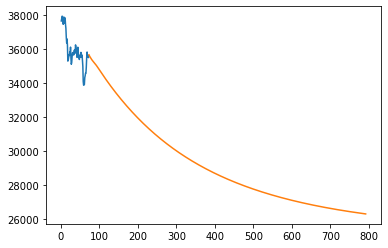

In [150]:
plt.plot(day_new,scaler.inverse_transform(df1[36254:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[34200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)